<a href="https://colab.research.google.com/github/hoaian1232812/Lab_ML/blob/main/Lab_8_20130193_HoThanhHoaiAn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab deals with **GridSearchCV** for tuning the hyper-parameters of an estimator and applying vectorization techniques to the **movie reviews dataset** for classification task. 

*   **Deadline: 23:59, 17/4/2023**



# Import libraries

In [ ]:
from sklearn import datasets
from sklearn import svm
from sklearn import metrics as m
from sklearn.model_selection import train_test_split as tts, GridSearchCV as gs_cv
from prettytable import PrettyTable
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
def score_metrix_GridSearchCV(clf, param_gird, score=None, average='binary', x_train=None, x_test=None, y_train=None, y_test=None,pos_label=1):
  grid_class = gs_cv(estimator=clf, param_grid=param_grid, n_jobs=2,scoring='accuracy',refit = True, return_train_score=True,cv=10)
  grid_class.fit(x_train, y_train)
  y_predict = grid_class.predict(x_test)
  ac = m.accuracy_score(y_test, y_predict)
  ps = m.precision_score(y_test, y_predict,average=average,pos_label=pos_label)
  rs = m.recall_score(y_test, y_predict,average=average,pos_label=pos_label)
  fs = m.f1_score(y_test, y_predict,average=average,pos_label=pos_label)
  print('Best_param:',grid_class.best_params_)
  print('Predict:',y_predict)
  print('Accuracy', ac)
  print('Precision', ps)
  print('Recall', rs)
  print('F1', fs)
  print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
  score.append(ac)
  score.append(ps)
  score.append(rs)
  score.append(fs)
  return score

In [ ]:
def printPrettyTable(rows=[]):
  t = PrettyTable(['Classification','Accuracy','Precision','Recall','F1'])
  for r in rows:
    t.add_row(r)
  print(t)

#Task 1. With **iris** dataset
*  1.1. Apply **GridSearchCV** for **SVM** to find the best hyperparameters using the following param_grid.

```
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}
```




In [ ]:
data = datasets.load_iris()
x_train, x_test, y_train, y_test = tts(data['data'], data['target'], test_size=0.3, random_state=1)
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}
clf = svm.SVC()

Best_param: {'C': 1, 'gamma': 1, 'kernel': 'linear'}
Predict: [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1]
Accuracy 1.0
Precision 1.0
Recall 1.0
F1 1.0


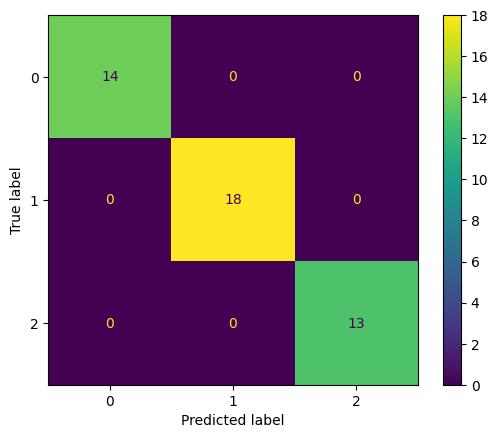

In [ ]:
svm = score_metrix_GridSearchCV(clf, param_grid, score=["SVM"], average='macro', x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test)

*  1.2. Apply **GridSearchCV** for **kNN** to find the best hyperparameters using the following param_grid.

```
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
```
where

    *  **n_neighbors**: Decide the best k based on the values we have computed earlier.
    *  **weights**: Check whether adding weights to the data points is beneficial to the model or not. 'uniform' assigns no weight, while 'distance' weighs points by the inverse of their distances meaning nearer points will have more weight than the farther points.
    *  **metric**: The distance metric to be used will calculating the similarity.


In [ ]:
param_grid = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
clf = KNeighborsClassifier()

Best_param: {'metric': 'minkowski', 'n_neighbors': 9, 'weights': 'distance'}
Predict: [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 1 2 1]
Accuracy 0.9555555555555556
Precision 0.9558404558404558
Recall 0.9558404558404558
F1 0.9558404558404558


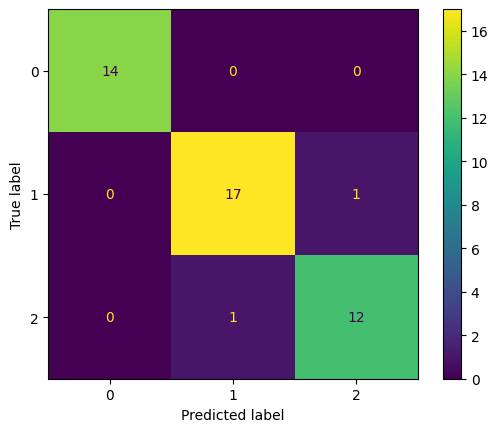

In [ ]:
knn = score_metrix_GridSearchCV(clf, param_grid, score=["KNN"], average='macro', x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test)

*  1.3. Apply **GridSearchCV** for **Random Forest** to find the best hyperparameters using the following param_grid.

```
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}
```

In [ ]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}
clf = RandomForestClassifier()

Best_param: {'max_depth': 6, 'max_features': None, 'max_leaf_nodes': 6, 'n_estimators': 100}
Predict: [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 1 2 1]
Accuracy 0.9555555555555556
Precision 0.9558404558404558
Recall 0.9558404558404558
F1 0.9558404558404558


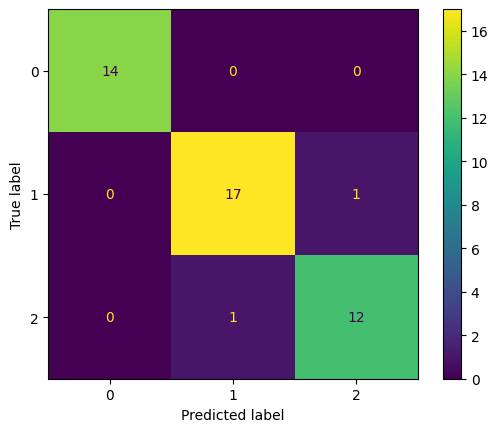

In [ ]:
rf = score_metrix_GridSearchCV(clf, param_grid, score=["RandomForest"], average='macro', x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test)

*   1.4 Compare the best obtained results from 1.1 to 1.3 (use PrettyTable to dispaly the results)

In [ ]:
printPrettyTable([svm,knn,rf])

+----------------+--------------------+--------------------+--------------------+--------------------+
| Classification |      Accuracy      |     Precision      |       Recall       |         F1         |
+----------------+--------------------+--------------------+--------------------+--------------------+
|      SVM       |        1.0         |        1.0         |        1.0         |        1.0         |
|      KNN       | 0.9555555555555556 | 0.9558404558404558 | 0.9558404558404558 | 0.9558404558404558 |
|  RandomForest  | 0.9555555555555556 | 0.9558404558404558 | 0.9558404558404558 | 0.9558404558404558 |
+----------------+--------------------+--------------------+--------------------+--------------------+


#Task 2. 
For breast cancer dataset (https://tinyurl.com/3vme8hr3) which could be loaded from datasets in sklearn as follows:

```
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
cancer = datasets.load_breast_cancer()
```

*   Apply **GridSearchCV** to different classification algorithms such as **SVM, kNN, LogisticRegression, RandomForest**.
*   Compare the results obtained by the best hyperparameters among classification algorithms.

In [ ]:
data = datasets.load_breast_cancer()
x_train, x_test, y_train, y_test = tts(data['data'], data['target'], test_size=0.3, random_state=1)

*   2.1. Apply **GridSearchCV** to **SVM** 


In [ ]:
clf = svm.SVC()
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}

Best_param: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
Predict: [0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0
 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0
 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1]
Accuracy 0.9415204678362573
Precision 0.9375
Recall 0.9722222222222222
F1 0.9545454545454546


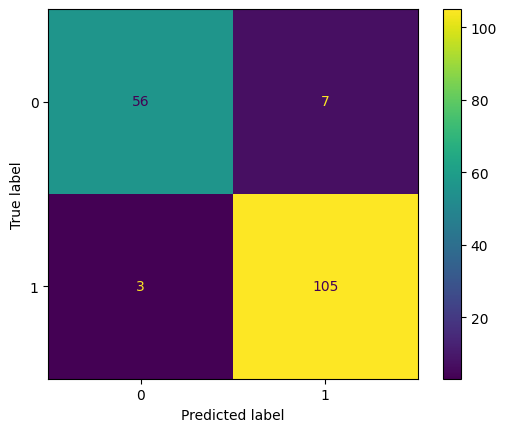

In [ ]:
svm = score_metrix_GridSearchCV(clf, param_grid, score=["SVM"], x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test)

*   2.2. Apply **GridSearchCV** to **kNN** 

In [ ]:
param_grid = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
clf = KNeighborsClassifier()

Best_param: {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'uniform'}
Predict: [1 1 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0
 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0
 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1]
Accuracy 0.935672514619883
Precision 0.9292035398230089
Recall 0.9722222222222222
F1 0.9502262443438914


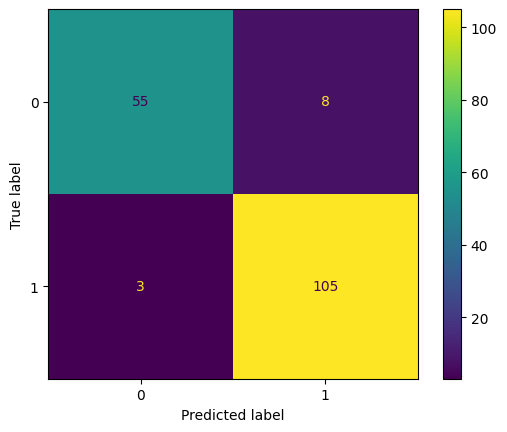

In [ ]:
knn = score_metrix_GridSearchCV(clf, param_grid, score=["KNN"], x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test)

*   2.3. Apply **GridSearchCV** to **LogisticRegression** 

In [ ]:
param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'C':[0.001, 0.01, 0.1, 1, 10, 100]}
logictic = LogisticRegression()

/usr/local/lib/python3.9/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Best_param: {'C': 100, 'solver': 'newton-cg'}
Predict: [1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0
 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0
 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1
 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1]
Accuracy 0.9649122807017544
Precision 0.9636363636363636
Recall 0.9814814814814815
F1 0.9724770642201834


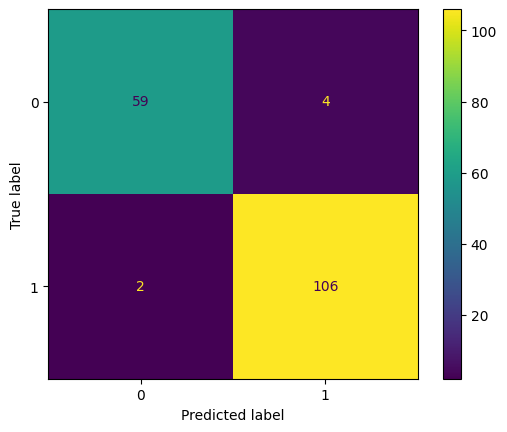

In [ ]:
lr = score_metrix_GridSearchCV(logictic, param_grid, score=["LogisticRegression"], x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test)

*   2.4. Apply **GridSearchCV** to **RandomForest** 

In [ ]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}
clf = RandomForestClassifier()

Best_param: {'max_depth': 6, 'max_features': 'sqrt', 'max_leaf_nodes': 9, 'n_estimators': 50}
Predict: [0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0
 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0
 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1
 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1]
Accuracy 0.935672514619883
Precision 0.944954128440367
Recall 0.9537037037037037
F1 0.9493087557603688


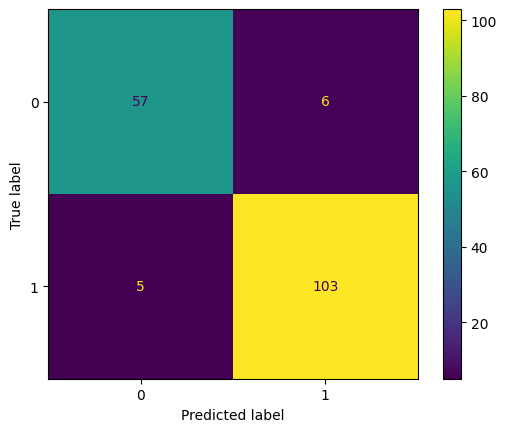

In [ ]:
rf = score_metrix_GridSearchCV(clf, param_grid, score=["RandomForest"], x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test)

*   2.5. Compare the best obtained results among classification algorithms (use PrettyTable to dispaly the results) 

In [ ]:
printPrettyTable([svm, knn, lr, rf])

+--------------------+--------------------+--------------------+--------------------+--------------------+
|   Classification   |      Accuracy      |     Precision      |       Recall       |         F1         |
+--------------------+--------------------+--------------------+--------------------+--------------------+
|        SVM         | 0.9415204678362573 |       0.9375       | 0.9722222222222222 | 0.9545454545454546 |
|        KNN         | 0.935672514619883  | 0.9292035398230089 | 0.9722222222222222 | 0.9502262443438914 |
| LogisticRegression | 0.9649122807017544 | 0.9636363636363636 | 0.9814814814814815 | 0.9724770642201834 |
|    RandomForest    | 0.935672514619883  | 0.944954128440367  | 0.9537037037037037 | 0.9493087557603688 |
+--------------------+--------------------+--------------------+--------------------+--------------------+


#Task 3. 
The dataset consists of **2000 user-created movie reviews** archived on the IMDb(Internet Movie Database). The reviews are equally partitioned into a positive set and a negative set (1000+1000). Each review consists of a plain text file (.txt) and a class label representing the overall user opinion. 
The class attribute has only two values: **pos** (positive) or **neg** (negative).


*   3.1 Importing additional libraries

In [ ]:
import nltk, random
nltk.download('movie_reviews')#download movie reviews dataset
from nltk.corpus import movie_reviews
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


*   3.2. Movie reviews information

In [ ]:
#code
print(len(movie_reviews.fileids()))
print(movie_reviews.categories())
print(movie_reviews.words()[:100])
print(movie_reviews.fileids()[:10])

2000
['neg', 'pos']
['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...]
['neg/cv000_29416.txt', 'neg/cv001_19502.txt', 'neg/cv002_17424.txt', 'neg/cv003_12683.txt', 'neg/cv004_12641.txt', 'neg/cv005_29357.txt', 'neg/cv006_17022.txt', 'neg/cv007_4992.txt', 'neg/cv008_29326.txt', 'neg/cv009_29417.txt']


*   3.3. Create dataset from movie reviews

In [ ]:
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]
random.seed(123)
random.shuffle(documents)

In [ ]:
print('Number of Reviews/Documents: {}'.format(len(documents)))
print('Corpus Size (words): {}'.format(np.sum([len(d) for (d,l) in documents])))
print('Sample Text of Doc 1:')
print('-'*30)
print(' '.join(documents[0][0][:50])) # first 50 words of the first document

Number of Reviews/Documents: 2000
Corpus Size (words): 1583820
Sample Text of Doc 1:
------------------------------
most movies seem to release a third movie just so it can be called a trilogy . rocky iii seems to kind of fit in that category , but manages to be slightly unique . the rocky formula of " rocky loses fight / rocky trains / rocky wins fight


In [ ]:
sentiment_distr = Counter([label for (words, label) in documents])
print(sentiment_distr)

Counter({'pos': 1000, 'neg': 1000})


*   3.4. Train test split

In [ ]:
train, test = train_test_split(documents, test_size = 0.33, random_state=42)

In [ ]:
## Sentiment Distrubtion for Train and Test
print(Counter([label for (words, label) in train]))
print(Counter([label for (words, label) in test]))

Counter({'neg': 674, 'pos': 666})
Counter({'pos': 334, 'neg': 326})


In [ ]:
X_train = [' '.join(words) for (words, label) in train]
X_test = [' '.join(words) for (words, label) in test]
y_train = [label for (words, label) in train]
y_test = [label for (words, label) in test]

*   3.5. Text Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

tfidf_vec = TfidfVectorizer(min_df = 10, token_pattern = r'[a-zA-Z]+')
X_train_bow = tfidf_vec.fit_transform(X_train) # fit train
X_test_bow = tfidf_vec.transform(X_test) # transform test

*   3.6. Apply **SVM** with **GridSearchCV** 

In [ ]:
param_grid = {'C': [1, 10],
              'gamma': [1, 0.1],
              'kernel': ['rbf','linear']}
clf = svm.SVC()

Best_param: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Predict: ['pos' 'neg' 'pos' 'neg' 'neg' 'neg' 'neg' 'neg' 'neg' 'pos' 'neg' 'pos'
 'pos' 'pos' 'pos' 'neg' 'pos' 'neg' 'pos' 'pos' 'pos' 'neg' 'neg' 'neg'
 'neg' 'neg' 'neg' 'neg' 'pos' 'pos' 'pos' 'neg' 'pos' 'neg' 'pos' 'pos'
 'pos' 'pos' 'neg' 'neg' 'neg' 'neg' 'neg' 'neg' 'pos' 'neg' 'pos' 'pos'
 'neg' 'pos' 'pos' 'pos' 'pos' 'neg' 'neg' 'neg' 'pos' 'pos' 'pos' 'neg'
 'neg' 'neg' 'pos' 'neg' 'neg' 'pos' 'pos' 'pos' 'pos' 'neg' 'pos' 'pos'
 'pos' 'neg' 'pos' 'neg' 'neg' 'neg' 'neg' 'pos' 'neg' 'pos' 'pos' 'pos'
 'pos' 'neg' 'pos' 'pos' 'pos' 'pos' 'pos' 'pos' 'pos' 'pos' 'neg' 'neg'
 'neg' 'neg' 'neg' 'neg' 'neg' 'neg' 'neg' 'pos' 'neg' 'pos' 'neg' 'neg'
 'neg' 'neg' 'neg' 'pos' 'neg' 'pos' 'neg' 'pos' 'pos' 'neg' 'pos' 'neg'
 'pos' 'neg' 'pos' 'neg' 'pos' 'neg' 'neg' 'pos' 'pos' 'pos' 'neg' 'neg'
 'pos' 'neg' 'pos' 'pos' 'pos' 'pos' 'pos' 'neg' 'pos' 'neg' 'neg' 'neg'
 'pos' 'pos' 'pos' 'neg' 'pos' 'pos' 'neg' 'pos' 'neg' 'pos' '

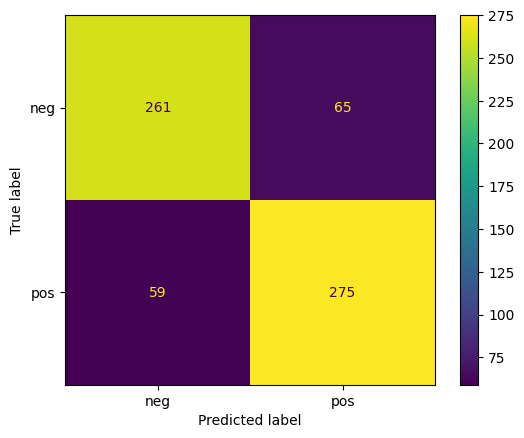

In [ ]:
svm = score_metrix_GridSearchCV(clf, param_grid, score=["SVM"], x_train=X_train_bow, x_test=X_test_bow, y_train=y_train, y_test=y_test,pos_label='pos')

*   3.7. Apply **RandomForest** with **GridSearchCV** 

In [ ]:
param_grid = {
    'n_estimators': [25, 150],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [6, 9],
    'max_leaf_nodes': [3, 6],
}
clf = RandomForestClassifier()

Best_param: {'max_depth': 6, 'max_features': 'sqrt', 'max_leaf_nodes': 6, 'n_estimators': 150}
Predict: ['pos' 'neg' 'pos' 'neg' 'neg' 'neg' 'neg' 'neg' 'neg' 'neg' 'neg' 'neg'
 'pos' 'pos' 'pos' 'neg' 'pos' 'pos' 'pos' 'pos' 'pos' 'neg' 'neg' 'pos'
 'neg' 'neg' 'neg' 'neg' 'pos' 'pos' 'pos' 'neg' 'pos' 'neg' 'pos' 'pos'
 'pos' 'pos' 'neg' 'pos' 'pos' 'neg' 'pos' 'neg' 'pos' 'neg' 'pos' 'neg'
 'neg' 'pos' 'pos' 'pos' 'pos' 'neg' 'pos' 'neg' 'neg' 'pos' 'pos' 'pos'
 'neg' 'neg' 'pos' 'neg' 'neg' 'pos' 'pos' 'pos' 'pos' 'neg' 'pos' 'pos'
 'pos' 'neg' 'pos' 'neg' 'pos' 'neg' 'neg' 'pos' 'neg' 'pos' 'neg' 'pos'
 'pos' 'neg' 'pos' 'pos' 'pos' 'pos' 'pos' 'pos' 'pos' 'pos' 'pos' 'neg'
 'pos' 'neg' 'neg' 'pos' 'pos' 'neg' 'neg' 'pos' 'neg' 'pos' 'neg' 'pos'
 'pos' 'neg' 'neg' 'neg' 'neg' 'neg' 'neg' 'pos' 'pos' 'neg' 'pos' 'neg'
 'pos' 'neg' 'pos' 'neg' 'neg' 'neg' 'neg' 'pos' 'pos' 'pos' 'neg' 'pos'
 'pos' 'neg' 'pos' 'pos' 'pos' 'pos' 'pos' 'pos' 'pos' 'neg' 'neg' 'neg'
 'pos' 'pos' 'pos' '

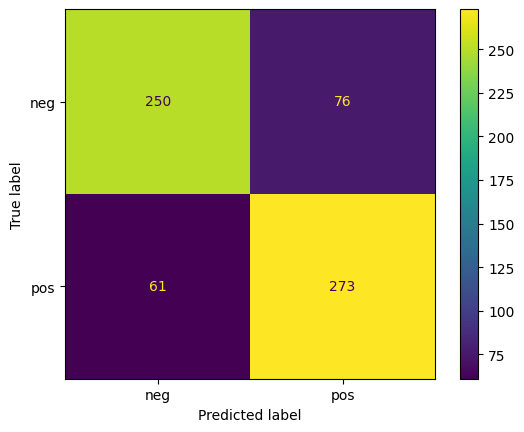

In [ ]:
rf = score_metrix_GridSearchCV(clf, param_grid, score=["RandomForest"], x_train=X_train_bow, x_test=X_test_bow, y_train=y_train, y_test=y_test,pos_label='pos')

*   3.8. Apply **kNN** with **GridSearchCV** 

In [ ]:
param_grid = { 'n_neighbors' : [5,7,9],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean']}
clf = KNeighborsClassifier()

Best_param: {'metric': 'minkowski', 'n_neighbors': 9, 'weights': 'distance'}
Predict: ['pos' 'pos' 'pos' 'pos' 'neg' 'pos' 'neg' 'neg' 'neg' 'pos' 'neg' 'pos'
 'pos' 'pos' 'pos' 'pos' 'neg' 'neg' 'pos' 'pos' 'pos' 'pos' 'pos' 'pos'
 'pos' 'neg' 'pos' 'neg' 'pos' 'pos' 'pos' 'pos' 'pos' 'pos' 'pos' 'pos'
 'pos' 'neg' 'pos' 'pos' 'neg' 'neg' 'pos' 'pos' 'pos' 'neg' 'pos' 'pos'
 'neg' 'pos' 'pos' 'pos' 'pos' 'pos' 'pos' 'pos' 'neg' 'neg' 'pos' 'pos'
 'neg' 'pos' 'pos' 'pos' 'neg' 'pos' 'pos' 'pos' 'pos' 'pos' 'pos' 'pos'
 'pos' 'neg' 'pos' 'pos' 'pos' 'pos' 'pos' 'pos' 'pos' 'pos' 'neg' 'pos'
 'pos' 'pos' 'pos' 'pos' 'pos' 'pos' 'pos' 'pos' 'pos' 'neg' 'pos' 'neg'
 'pos' 'pos' 'neg' 'pos' 'pos' 'neg' 'neg' 'pos' 'pos' 'pos' 'pos' 'pos'
 'pos' 'neg' 'neg' 'pos' 'pos' 'pos' 'pos' 'pos' 'pos' 'pos' 'pos' 'pos'
 'pos' 'neg' 'pos' 'pos' 'pos' 'neg' 'neg' 'pos' 'pos' 'pos' 'pos' 'pos'
 'pos' 'neg' 'pos' 'pos' 'pos' 'neg' 'pos' 'neg' 'pos' 'neg' 'neg' 'neg'
 'pos' 'pos' 'pos' 'pos' 'pos' 'pos' '

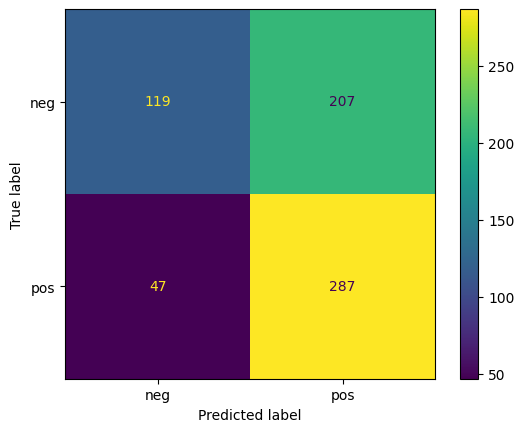

In [ ]:
knn = score_metrix_GridSearchCV(clf, param_grid, score=["KNN"], x_train=X_train_bow, x_test=X_test_bow, y_train=y_train, y_test=y_test,pos_label='pos')

*   3.9. Apply **LogisticRegression** with **GridSearchCV** 

In [ ]:
param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear'],
              'C':[0.001, 0.01, 0.1, 1]}
clf = LogisticRegression()

Best_param: {'C': 1, 'solver': 'liblinear'}
Predict: ['pos' 'neg' 'pos' 'neg' 'neg' 'pos' 'neg' 'neg' 'neg' 'pos' 'neg' 'neg'
 'pos' 'neg' 'neg' 'neg' 'neg' 'neg' 'pos' 'neg' 'pos' 'pos' 'neg' 'neg'
 'neg' 'neg' 'pos' 'neg' 'pos' 'pos' 'pos' 'pos' 'pos' 'neg' 'pos' 'pos'
 'pos' 'pos' 'neg' 'pos' 'neg' 'neg' 'neg' 'neg' 'pos' 'neg' 'pos' 'pos'
 'neg' 'pos' 'pos' 'pos' 'pos' 'neg' 'neg' 'neg' 'pos' 'pos' 'neg' 'neg'
 'neg' 'neg' 'pos' 'neg' 'neg' 'pos' 'pos' 'pos' 'pos' 'pos' 'pos' 'pos'
 'pos' 'neg' 'pos' 'pos' 'neg' 'neg' 'neg' 'pos' 'neg' 'pos' 'neg' 'pos'
 'pos' 'pos' 'pos' 'pos' 'pos' 'pos' 'pos' 'pos' 'pos' 'pos' 'pos' 'neg'
 'pos' 'neg' 'neg' 'neg' 'neg' 'neg' 'neg' 'pos' 'neg' 'pos' 'neg' 'neg'
 'pos' 'neg' 'neg' 'pos' 'pos' 'pos' 'neg' 'pos' 'pos' 'neg' 'pos' 'neg'
 'pos' 'neg' 'pos' 'neg' 'pos' 'neg' 'neg' 'pos' 'pos' 'pos' 'neg' 'neg'
 'pos' 'neg' 'pos' 'pos' 'pos' 'pos' 'neg' 'neg' 'pos' 'neg' 'neg' 'neg'
 'pos' 'pos' 'pos' 'neg' 'pos' 'pos' 'neg' 'pos' 'neg' 'pos' 'pos' 'neg

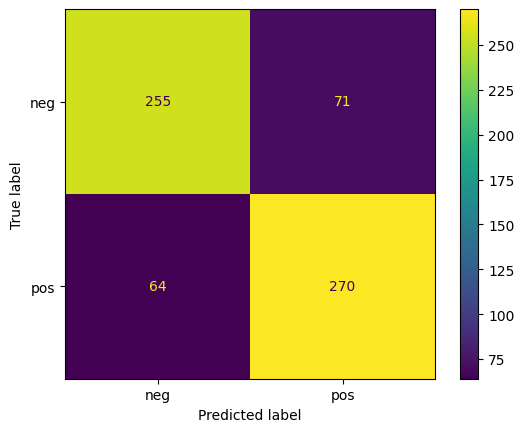

In [ ]:
logis = score_metrix_GridSearchCV(clf, param_grid, score=["LogisticRegression"], x_train=X_train_bow, x_test=X_test_bow, y_train=y_train, y_test=y_test,pos_label='pos')

*   3.10. Compare the best obtained results among classification algorithms (use PrettyTable to dispaly the results) 

In [ ]:
printPrettyTable([svm, rf, knn, logis])

+--------------------+--------------------+--------------------+--------------------+--------------------+
|   Classification   |      Accuracy      |     Precision      |       Recall       |         F1         |
+--------------------+--------------------+--------------------+--------------------+--------------------+
|        SVM         | 0.8121212121212121 | 0.8088235294117647 | 0.8233532934131736 | 0.8160237388724036 |
|    RandomForest    | 0.7924242424242425 | 0.7822349570200573 | 0.8173652694610778 | 0.7994143484626647 |
|        KNN         | 0.6151515151515151 | 0.5809716599190283 | 0.8592814371257484 | 0.6932367149758453 |
| LogisticRegression | 0.7954545454545454 | 0.7917888563049853 | 0.8083832335329342 |        0.8         |
+--------------------+--------------------+--------------------+--------------------+--------------------+


#Finally,
Save a copy in your Github. Remember renaming the notebook.